# Project : Prediction of Taxi Fare

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [3]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df.shape

(50000, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [6]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [7]:
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [8]:
from math import radians,sqrt,cos,sin,asin

In [9]:
df["date_time_of_pickup"]=pd.to_datetime(df["date_time_of_pickup"])

In [10]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1
49996,19:18.0,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1
49997,53:00.0,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1
49998,09:00.0,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2


In [11]:
df.dtypes

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [12]:
def dist(lo1,lo2,la1,la2):
    lo1 = radians(lo1)
    lo2 = radians(lo2)
    la1 = radians(la1)
    la2 = radians(la2)
    dlo=lo2-lo1
    dla=la2-la1
    a=sin(dla/2)**2+cos(la1)*cos(la2)*sin(dlo/2)**2
    c=2*asin(sqrt(a))
    r=6371
    return c*r

In [13]:
d = []
for i in range(df.shape[0]):
    d.append(dist(df["longitude_of_pickup"][i],df["longitude_of_dropoff"][i],df["latitude_of_pickup"][i],df["latitude_of_dropoff"][i]))

In [14]:
df["Distance"]=d

In [15]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Distance
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157
...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,4.940374
49996,19:18.0,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,0.874706
49997,53:00.0,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,2.263286
49998,09:00.0,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,0.665245


In [16]:
week={0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}

In [17]:
df["Day"]=df["date_time_of_pickup"].dt.weekday.map(week)

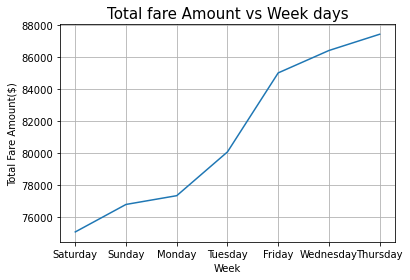

In [18]:
plt.plot()
df.groupby("Day")["amount"].sum().sort_values().plot()

plt.xlabel("Week", fontsize=10)
plt.ylabel("Total Fare Amount($)", fontsize=10)
plt.title("Total fare Amount vs Week days", fontsize=15)
plt.grid()
plt.show()

In [19]:
df["Hour"]=df["date_time_of_pickup"].dt.hour

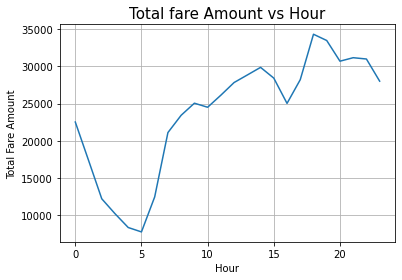

In [20]:
plt.plot()
df.groupby("Hour")["amount"].sum().plot()

plt.xlabel("Hour", fontsize=10)
plt.ylabel("Total Fare Amount", fontsize=10)
plt.title("Total fare Amount vs Hour", fontsize=15)
plt.grid()
plt.show()

In [21]:
df["Monthday"]=df["date_time_of_pickup"].dt.day

In [22]:
for day in list(df["date_time_of_pickup"].dt.day.sort_values().unique()):
    print(f"Date : {day} \t Total fare Amount : ${round(df[df.date_time_of_pickup.dt.day==day].amount.sum(), 2)}")

Date : 1 	 Total fare Amount : $17229.03
Date : 2 	 Total fare Amount : $17711.51
Date : 3 	 Total fare Amount : $17887.56
Date : 4 	 Total fare Amount : $16871.76
Date : 5 	 Total fare Amount : $18426.86
Date : 6 	 Total fare Amount : $18898.4
Date : 7 	 Total fare Amount : $19953.12
Date : 8 	 Total fare Amount : $19773.47
Date : 9 	 Total fare Amount : $19096.83
Date : 10 	 Total fare Amount : $19103.29
Date : 11 	 Total fare Amount : $18543.99
Date : 12 	 Total fare Amount : $20143.27
Date : 13 	 Total fare Amount : $19773.21
Date : 14 	 Total fare Amount : $18941.62
Date : 15 	 Total fare Amount : $19425.37
Date : 16 	 Total fare Amount : $19864.5
Date : 17 	 Total fare Amount : $19498.61
Date : 18 	 Total fare Amount : $19117.84
Date : 19 	 Total fare Amount : $19866.99
Date : 20 	 Total fare Amount : $18862.46
Date : 21 	 Total fare Amount : $20123.13
Date : 22 	 Total fare Amount : $18670.33
Date : 23 	 Total fare Amount : $18803.67
Date : 24 	 Total fare Amount : $18053.6
Date

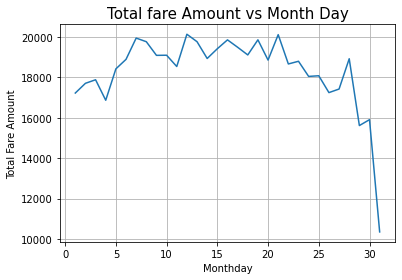

In [23]:
plt.plot()
df.groupby("Monthday")["amount"].sum().plot()
plt.xlabel("Monthday", fontsize=10)
plt.ylabel("Total Fare Amount", fontsize=10)
plt.title("Total fare Amount vs Month Day", fontsize=15)
plt.grid()
plt.show()

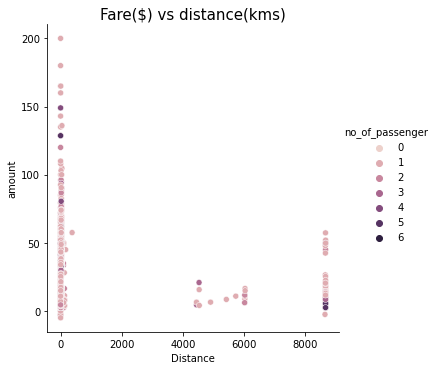

In [24]:
sns.relplot(data = df, kind = "scatter",x = "Distance",y = "amount",
            hue = "no_of_passenger")
plt.title("Fare($) vs distance(kms)" , fontsize=15)
plt.show()

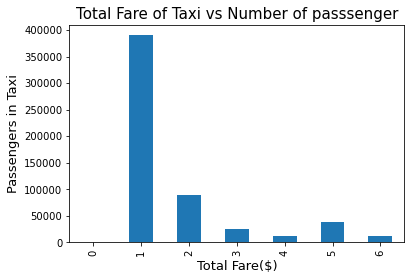

In [25]:
plt.plot()
df.groupby("no_of_passenger")["amount"].sum().plot.bar()
plt.xlabel("Total Fare($)",fontsize =13)
plt.ylabel("Passengers in Taxi", fontsize =13)
plt.title("Total Fare of Taxi vs Number of passsenger", fontsize = 15)
plt.show()

In [26]:
month={ 1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",7:"July",8:"August",9:"September",10:"October",11:"November",12:"December"}
df["Month"]=df["date_time_of_pickup"].dt.month.map(month)

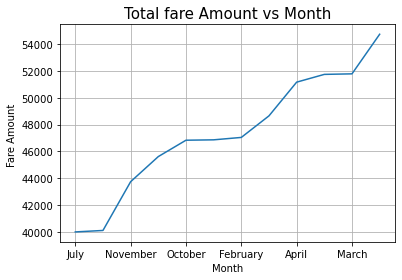

In [27]:
plt.plot()
df.groupby("Month")["amount"].sum().sort_values().plot()

plt.xlabel("Month", fontsize=10)
plt.ylabel("Fare Amount ", fontsize=10)
plt.title("Total fare Amount vs Month", fontsize=15)
plt.grid()
plt.show()

In [28]:
df["Year"]=df["date_time_of_pickup"].dt.year

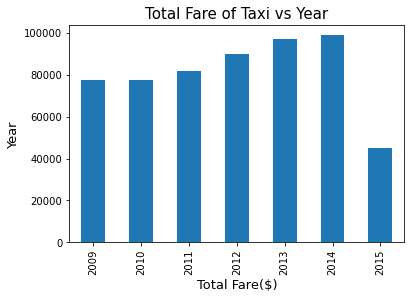

In [29]:
plt.plot()
df.groupby("Year")["amount"].sum().plot.bar()
plt.xlabel("Total Fare($)",fontsize =13)
plt.ylabel("Year", fontsize =13)
plt.title("Total Fare of Taxi vs Year", fontsize = 15)
plt.show()

In [30]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Distance,Day,Hour,Monthday,Month,Year
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,Sunday,17,15,June,2009
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,Monday,16,5,January,2010
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,Wednesday,0,18,August,2011
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,Friday,4,21,April,2012
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,Monday,7,9,March,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,4.940374,Tuesday,23,12,June,2013
49996,19:18.0,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,0.874706,Sunday,17,22,June,2015
49997,53:00.0,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,2.263286,Saturday,4,30,January,2011
49998,09:00.0,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,0.665245,Monday,7,6,November,2012


In [31]:
df.drop(["unique_id","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff","longitude_of_pickup","Day","Month"], axis=1, inplace=True)

In [32]:
df["WeekDay"]=df["date_time_of_pickup"].dt.weekday
df["Month"]=df["date_time_of_pickup"].dt.month
df.drop("date_time_of_pickup", axis=1, inplace=True)

In [33]:
X = df.drop(['amount'], axis=1)
y = df[['amount']]

In [34]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=26)

In [35]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression()

In [36]:
reg_model.score(X_train, y_train)

0.018420614541330815

In [37]:
reg_model.score(X_test, y_test)

0.013946873553340122

In [38]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(criterion="friedman_mse",max_depth=3)

In [39]:
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=3)

In [40]:
model.score(X_train,y_train)

0.6926814247781876

In [41]:
model.score(X_test,y_test)

0.6983820866766571

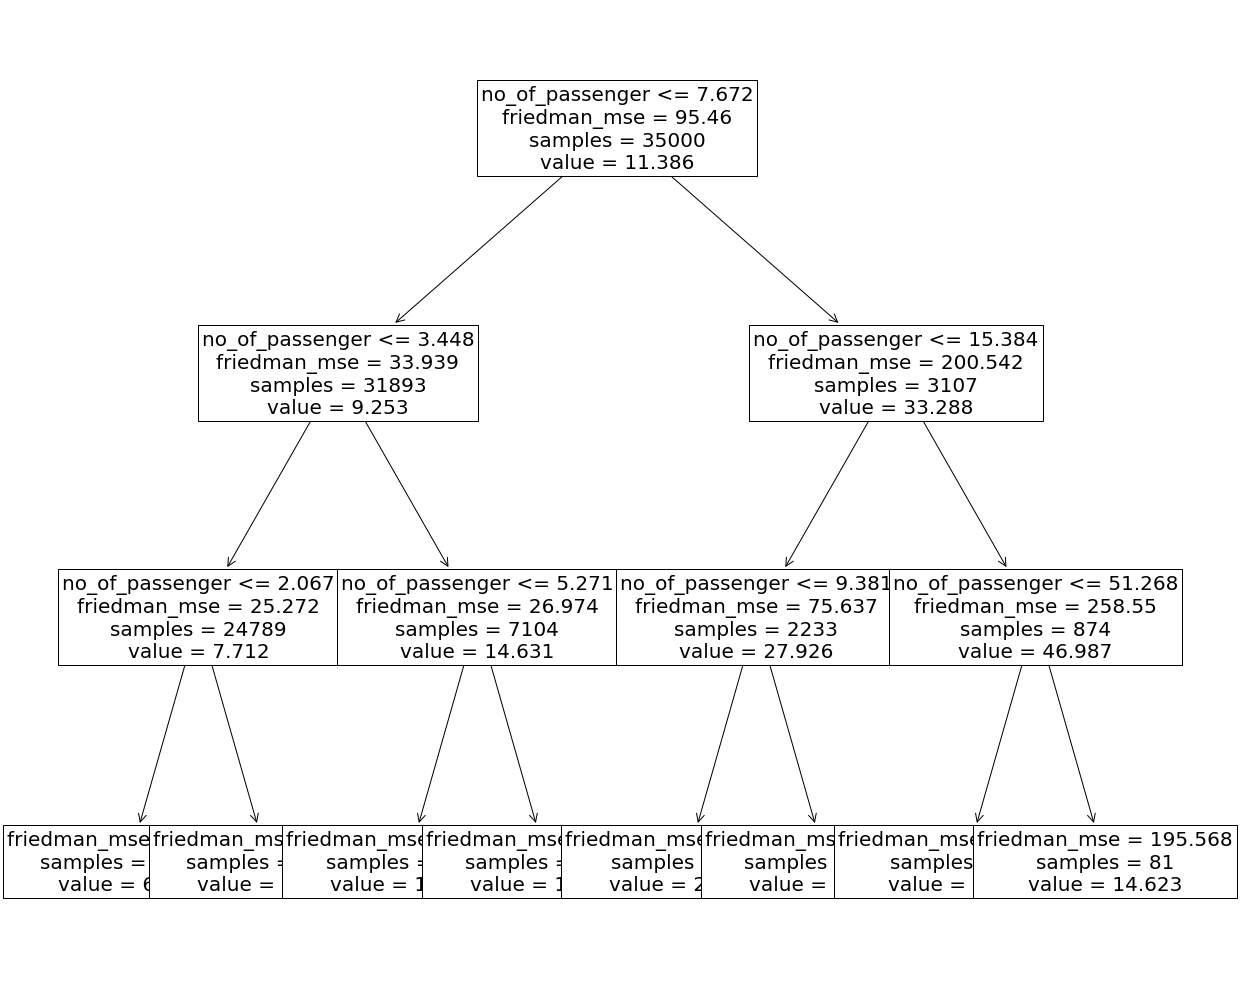

In [43]:
from sklearn import tree
plt.figure(figsize = (20,18))
tree.plot_tree(model,fontsize=20, feature_names=df.columns)
plt.show()